Introduction

Avacado is a fruit heavily consumed in USA.Under this project we will find out the Average price of Avacado on the basis of total volume,Total number of avocado with PLU (Product lookup codes for Hass Avacado)4046,4225 and4770 sold,Total bags,small bags, large bags,Xlarge bags,Tpye,year and region.

In [413]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


Loading Dataset into "df"

In [414]:
df=pd.read_csv('avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [415]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

The relavent columns in dataset are:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Bags-  'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'


*Removing "Unnamed"column as it is serial numbers and not contributing any value in given dataset

In [416]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [417]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

*Given dataset type is mix of object,float and integers

In [418]:
df['Date'].nunique #Converting Categorical features (Date,Region and Type)into numerical

<bound method IndexOpsMixin.nunique of 0       27-12-2015
1       20-12-2015
2       13-12-2015
3       06-12-2015
4       29-11-2015
           ...    
1512    16-10-2016
1513    09-10-2016
1514    02-10-2016
1515    25-09-2016
1516    18-09-2016
Name: Date, Length: 1517, dtype: object>

In [419]:
df['region'].nunique()

51

In [420]:
df['type'].nunique()

1

In [421]:
df.keys()

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [423]:
df.shape

(1517, 13)

In [424]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [425]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


As per above statistics description there is no null value in given dataset.Most of the outliers falls in xLarge bags.Standard deviation is on higher side in some of the columns.In most of the columns there is big diffrence minimum-maximum, mean and 50%

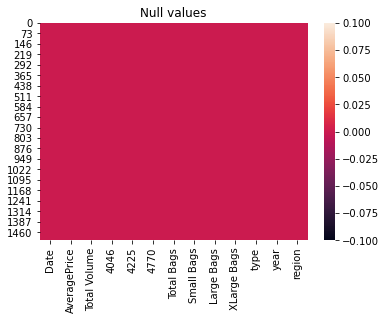

In [426]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There is no null values in given dataset

In [427]:
dfcor=df.corr()# Checking correlation
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


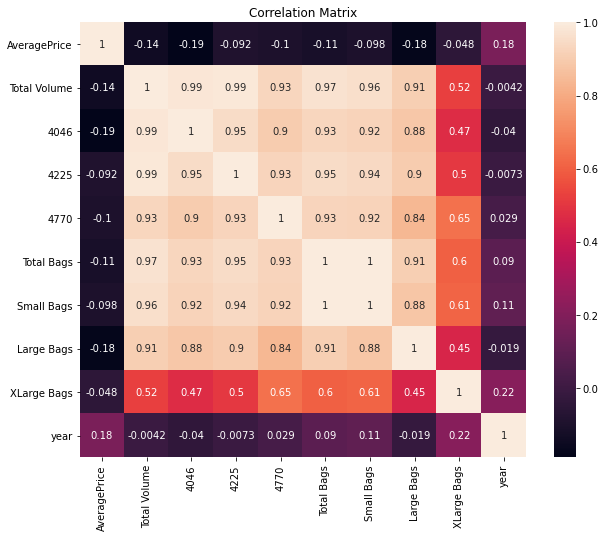

In [428]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

The heatmap shows that all the columns are correlate with each other but not with target variable Average Price columns.So we need to work on that.

In [429]:
corr_matrix=df.corr()

In [430]:
corr_matrix["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
Name: AveragePrice, dtype: float64

In [431]:
df.drop(['Date'],axis='columns', inplace=True) 


In [432]:
# spliting the independent and target variables in x and y
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [433]:
# see that the target feature is discrete
print(set(df['AveragePrice']))

{0.99, 1.33, 1.08, 1.28, 1.35, 1.26, 0.98, 1.02, 1.07, 1.12, 1.17, 1.0, 1.25, 0.75, 0.84, 1.5, 1.43, 1.18, 1.68, 1.11, 1.36, 1.61, 0.79, 0.54, 1.04, 1.29, 1.54, 0.63, 0.97, 0.72, 1.22, 1.47, 1.15, 1.4, 1.58, 0.76, 0.51, 1.01, 1.51, 0.6, 0.94, 0.69, 1.19, 1.44, 1.37, 1.62, 0.8, 1.05, 1.3, 0.64, 0.73, 1.23, 1.48, 0.82, 0.57, 1.16, 1.41, 1.66, 0.93, 0.67, 0.92, 0.83, 0.68, 0.85, 0.62, 0.87, 0.88, 0.89, 1.34, 1.09, 0.77, 0.52, 0.66, 1.27, 1.52, 0.61, 0.86, 0.95, 0.7, 1.45, 1.2, 1.13, 1.38, 1.63, 0.81, 0.56, 1.31, 1.06, 1.56, 0.9, 0.65, 0.74, 0.49, 1.24, 1.49, 0.58, 1.42, 1.1, 1.6, 0.78, 0.53, 1.03, 1.53, 0.96, 0.71, 1.21, 1.46, 1.14, 1.39, 1.64, 1.32, 1.57, 0.91}


Checking outliers

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

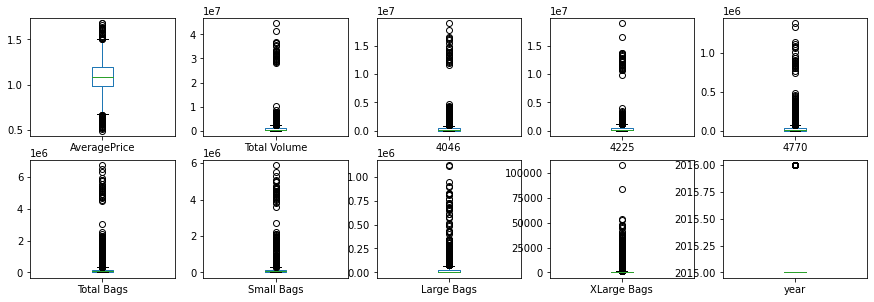

In [434]:
df.plot(kind='box',subplots=True, layout=(4,5), figsize= (15,10))

As per above graph column Total volume,4046,4225,4770,Total bags,small bags large bags and Xlarge bags have outliers.We will go ahead with outliers as the data loss is on very higher side after removing outliers

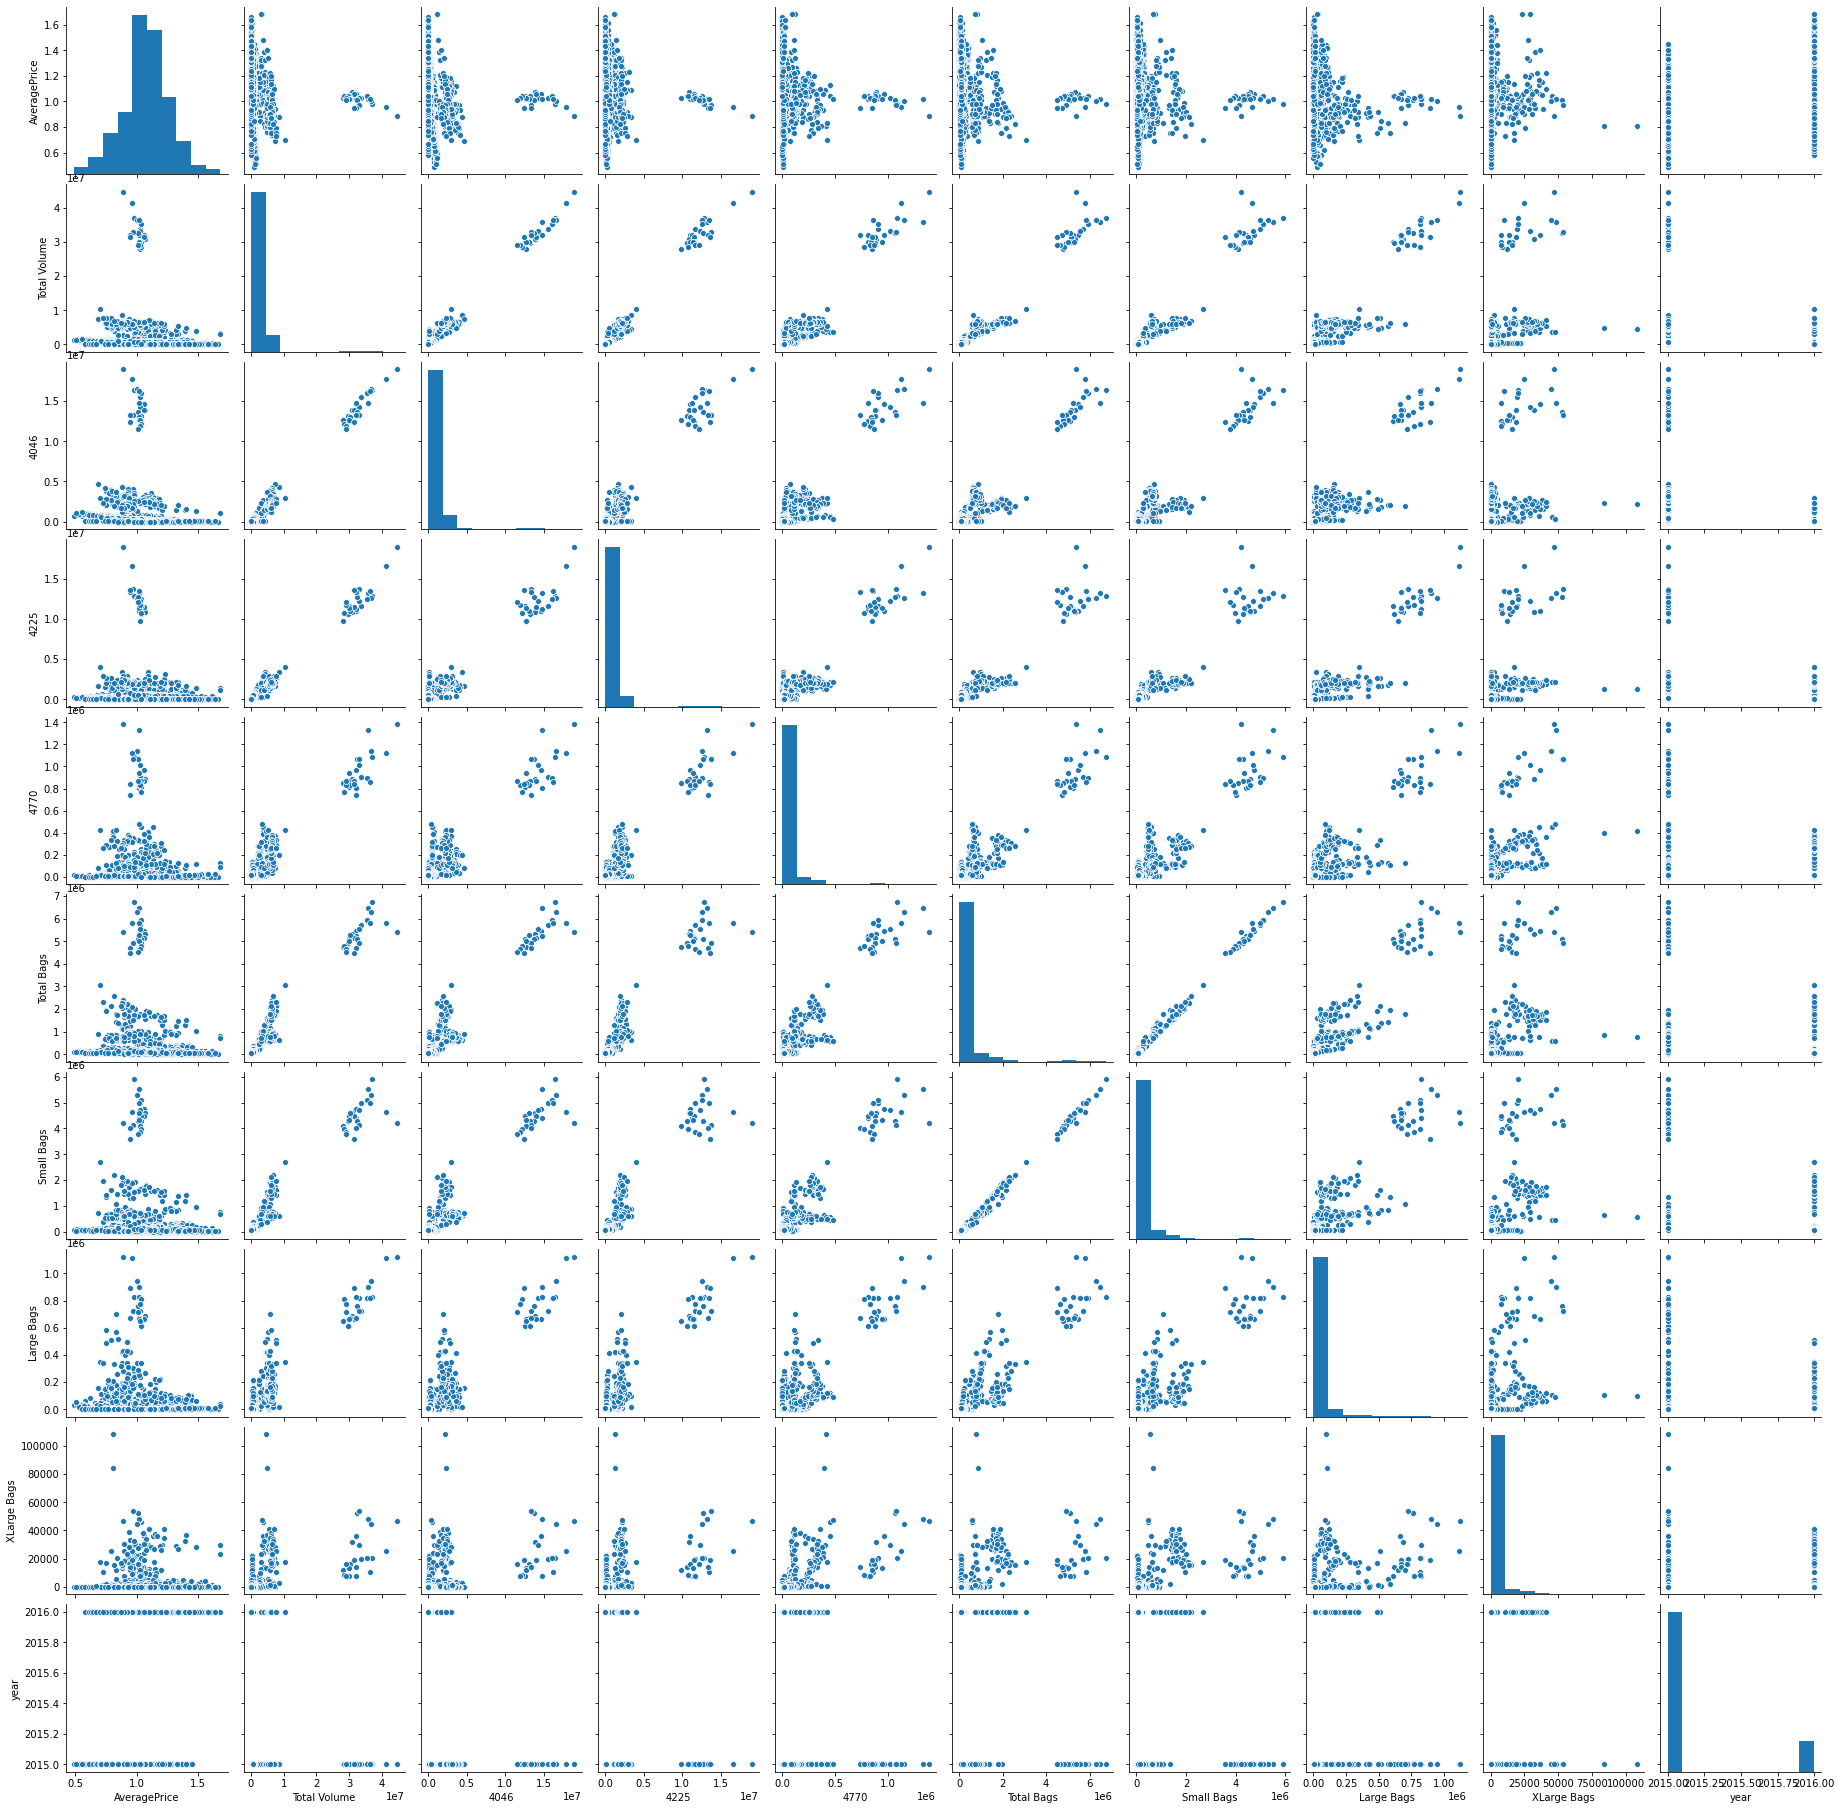

In [435]:
#Checking skewness of dataset
sns.pairplot(df)

except AveragePrice all columns have skewness

In [436]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

Removing skewness with the help of Log methods

In [437]:
skew=("AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [438]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
dtype: float64

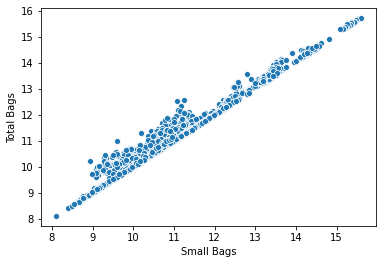

In [439]:
sns.scatterplot(x="Small Bags",y="Total Bags",data=df)

There is strong correlation between small and total bags

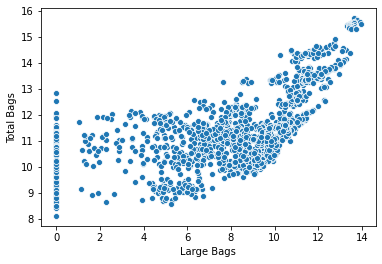

In [440]:
sns.scatterplot(x="Large Bags",y="Total Bags",data=df)

There is weak correlation between Large and Total bags

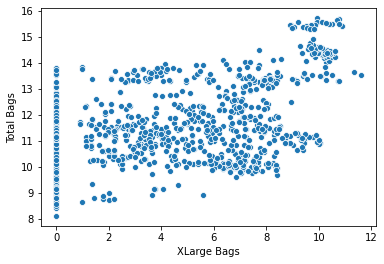

In [441]:
sns.scatterplot(x="XLarge Bags",y="Total Bags",data=df)

The graphs show that there is weak correlation between XLarge and Total bags

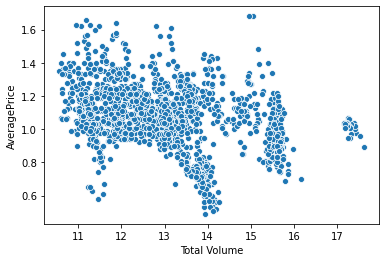

In [442]:

sns.scatterplot(x="Total Volume",y="AveragePrice",data=df)

The above graph shows that Total volume is negatively correlated with Average price.

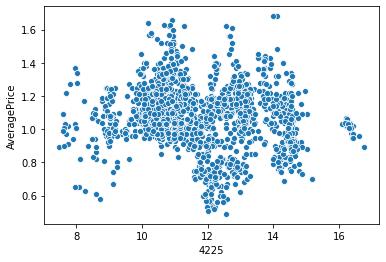

In [443]:
sns.scatterplot(x="4225",y="AveragePrice",data=df)

Variable 4225 is negatively correlated with target variable AveragePrice

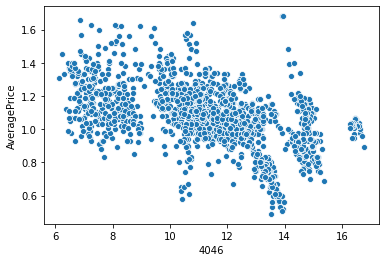

In [444]:
sns.scatterplot(x="4046",y="AveragePrice",data=df)

4046 has again negative correlation with our target variable Average price

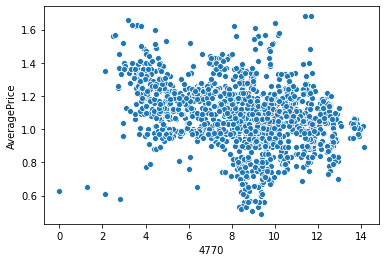

In [445]:
sns.scatterplot(x="4770",y="AveragePrice",data=df)

Like other variables 4770 has negative relation with target variable AveragePrice

Encoding catogorical data into numerical with the help of LablEncoder

In [446]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["type"]=LE.fit_transform(df["type"])
df["region"]=LE.fit_transform(df["region"])

Spliting independent variables and target variables & scaling data with StandardScaler

In [447]:

x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [448]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.35676174, -1.82816171, -0.56752404, ...,  0.        ,
        -0.44100815, -1.3143384 ],
       [-1.46638736, -2.01206913, -0.68423257, ...,  0.        ,
        -0.44100815, -1.3143384 ],
       [-0.9321394 , -1.94183376, -0.15924137, ...,  0.        ,
        -0.44100815, -1.3143384 ],
       ...,
       [-0.64565294, -0.20190426, -0.58460671, ...,  0.        ,
         2.26753179, -0.88028586],
       [-0.60503087, -0.13577946, -0.57688492, ...,  0.        ,
         2.26753179, -0.88028586],
       [-0.62805557, -0.23299293, -0.5703497 , ...,  0.        ,
         2.26753179, -0.88028586]])

Training,predicting and testing Model

In [449]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)


best accuracy is  0.6473901152849193 on Random_state 157


the Random_state 157 is fetching best accuracy of 64% for our model

In [450]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=157)

In [451]:
lr.fit(x_train,y_train)

LinearRegression()

In [452]:
predrf_test=lr.predict(x_test)

In [453]:
print(r2_score(y_test,predrf_test))

0.6473901152849193


In [454]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=57)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))


0.9061665426613076
Mean absolute error: 0.039203333333333285
Mean squared error: 0.002508282999999995
Root mean squared error: 0.0500827615053323


In [455]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.9061665426613076
Mean absolute error: 0.039203333333333285
Mean squared error: 0.002508282999999995
Root mean squared error: 0.0500827615053323


Checking the accuracy with the help of cross validation method

In [456]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9061665426613076

In [457]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9061665426613076

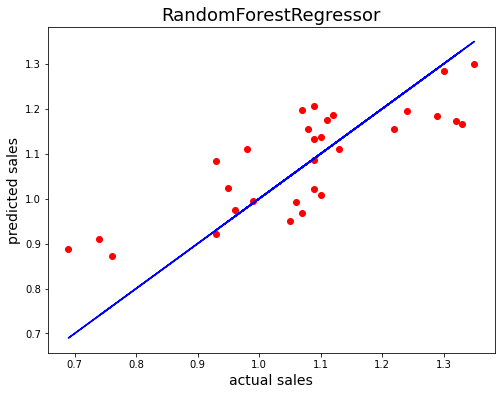

In [458]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual sales',fontsize=14)
plt.ylabel('predicted sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

The above graph shows that best fit line is covering and near to most of the datapoint


Minimum difference in accuracy and cross validation score is for RandomForestRegressor so this is our best model

In [459]:
from sklearn.model_selection import GridSearchCV  #Hyper tuning with Gridsearch
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf_decision=rf.predict(x_test)
rfs=r2_score(y_test,predrf_decision)
print("R2 Score:",rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("corss val score:",rfs*100)

In [ ]:
import joblib
joblib.dump(rf,"Avacado.obj")


In [ ]:

p=joblib.load("Avacado.obj")

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [ ]:
df_com